# Learning scikit-learn 

## An Introduction to Machine Learning in Python

### at PyData Chicago 2016 

**enhancing** _Sebastian Raschka_ codes https://github.com/rasbt/pydata-chicago2016-ml-tutorial

## Tuning Attempts

- brain-weight vs head-size -> r-squared: %64
    + dummy( gender_2) -> r-squared: %64
    + outlier elimination (< 0.99 quantile) -> r-squared: %71 (predictive power increased!)
    + outlier elimination (< 0.95 quantile) -> r-squared: %65 (predictive power increased!)
- log_brain-weight vs log_head-size -> r-squared: %65
    + dummy( gender_2) -> r-squared: %65, dummy variables
    + dummy( gender_2, age-group_2) -> r-squared: %65, dummy variables
        + outlier elimination (< 0.99 quantile) -> r-squared: %62
    + outlier elimination (< 0.99 quantile) -> r-squared: %72
- seq_brain-weight vs seq_head-size -> r-squared: %63 (a bit worse)
- sqrt_brain-weight vs sqrt_head-size -> r-squared: %64

# Table of Contents

* [1 Introduction to Machine Learning](#1-Introduction-to-Machine-Learning)
* [2 Linear Regression](#2-Linear-Regression)
    * [Loading the dataset](#Loading-the-dataset)
    * [Preparing the dataset](#Preparing-the-dataset)
    * [Fitting the model](#Fitting-the-model)
    * [Evaluating the model](#Evaluating-the-model)


In [279]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 1 Introduction to Machine Learning

# 2 Linear Regression

### Loading the dataset

Source: R.J. Gladstone (1905). "A Study of the Relations of the Brain to 
to the Size of the Head", Biometrika, Vol. 4, pp105-123


Description: Brain weight (grams) and head size (cubic cm) for 237
adults classified by gender and age group.


Variables/Columns
- Gender (1=Male, 2=Female)
- Age Range (1=20-46, 2=46+)
- Head size (cm^3)
- Brain weight (grams)


In [280]:
df = pd.read_csv('dataset_brain.txt', 
                 dtype={'gender': int, 'age-group': int},
                 encoding='utf-8', 
                 comment='#',
                 sep='\s+')
df.tail()

,gender,age-group,head-size,brain-weight
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170
236,2,2,3391,1120


In [281]:
df.describe()

# head-size and brain-weight has some outliers. right skewed

,gender,age-group,head-size,brain-weight
count,237.000000,237.000000,237.000000,237.000000
mean,1.434599,1.535865,3633.991561,1282.873418
std,0.496753,0.499768,365.261422,120.340446
min,1.000000,1.000000,2720.000000,955.000000
25%,1.000000,1.000000,3389.000000,1207.000000
50%,1.000000,2.000000,3614.000000,1280.000000
75%,2.000000,2.000000,3876.000000,1350.000000
max,2.000000,2.000000,4747.000000,1635.000000


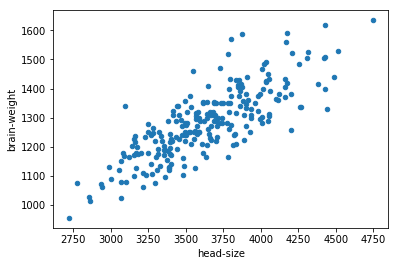

In [282]:
df.plot(x='head-size', y='brain-weight', kind='scatter')

#seems some outliers or a transformation need

## optimizing w/ outliers

In [283]:
# eliminate %1 (%99 quantile)
q1 = df['head-size'].quantile(0.95)
q2 = df['brain-weight'].quantile(0.95)

df = df[df['head-size'] < q1]
df = df[df['brain-weight'] < q2]

df.describe()

,gender,age-group,head-size,brain-weight
count,219.000000,219.000000,219.000000,219.000000
mean,1.465753,1.547945,3580.255708,1264.566210
std,0.499969,0.498836,318.046775,103.058098
min,1.000000,1.000000,2720.000000,955.000000
25%,1.000000,1.000000,3361.000000,1197.500000
50%,1.000000,2.000000,3577.000000,1270.000000
75%,2.000000,2.000000,3827.000000,1340.000000
max,2.000000,2.000000,4261.000000,1490.000000


## optimizing w/ Transormations

In [262]:
df['log_head-size'] = np.log(df['head-size'])
df['log_brain-weight'] = np.log(df['brain-weight'])

In [159]:
df['seq_head-size'] = df['head-size'] ^ 2
df['seq_brain-weight'] = df['brain-weight'] ^ 2

In [160]:
import math

df['sqrt_head-size'] = df['head-size'] ** 0.5
df['sqrt_brain-weight'] = df['brain-weight'] ** 0.5

In [161]:
df.columns

Index(['gender', 'age-group', 'head-size', 'brain-weight', 'log_head-size',
       'log_brain-weight', 'seq_head-size', 'seq_brain-weight',
       'sqrt_head-size', 'sqrt_brain-weight'],
      dtype='object')

In [264]:
df_with_dummies = df.copy()

df_with_dummies['gender'] = df_with_dummies['gender'].astype(object) 
df_with_dummies['age-group'] = df_with_dummies['age-group'].astype(object) 

df_with_dummies.drop(['head-size',
       'brain-weight'], axis=1, inplace=True)

df_with_dummies = pd.get_dummies(df_with_dummies, drop_first=True)

df_with_dummies.head(1)


,log_head-size,log_brain-weight,gender_2,age-group_2
1,8.226306,7.167809,0,0


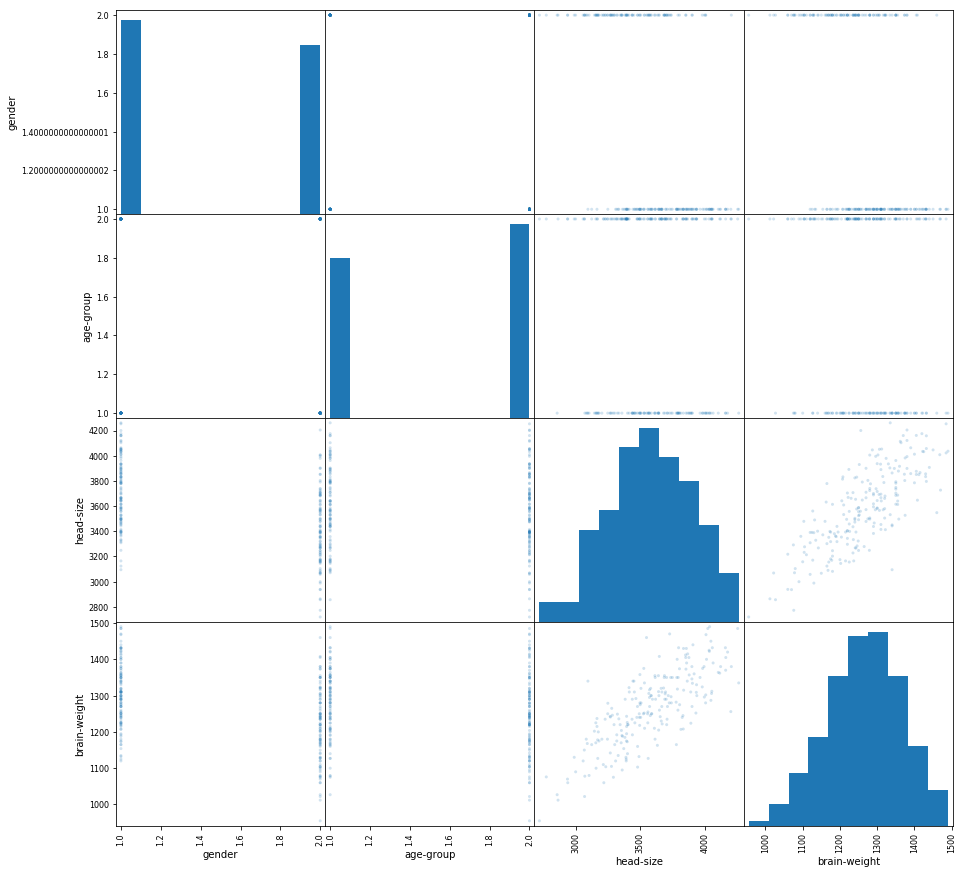

In [284]:
z = pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(15, 15))

# log transformation seems not promising!

In [285]:
df.groupby(['age-group', 'gender']).size()

# seems we can use 2 categorical feature

age-group  gender
1          1         47
           2         52
2          1         70
           2         50
dtype: int64

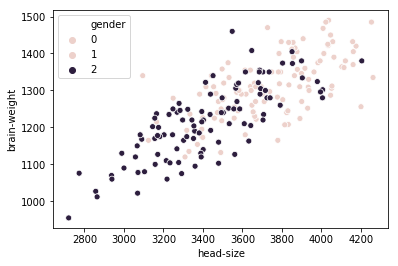

In [286]:
# for females, data has more variance.

sns.scatterplot(x='head-size', y='brain-weight', hue='gender', data=df)

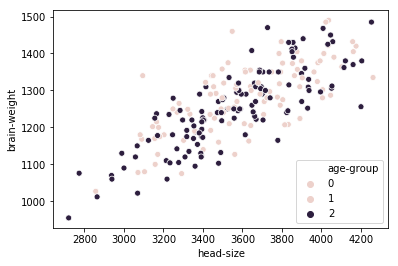

In [287]:
# 

sns.scatterplot(x='head-size', y='brain-weight', hue='age-group', data=df)

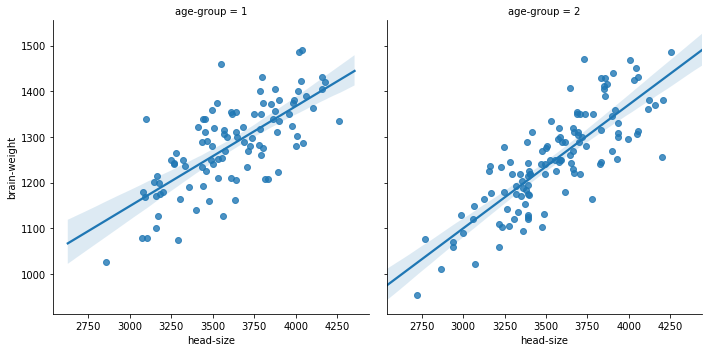

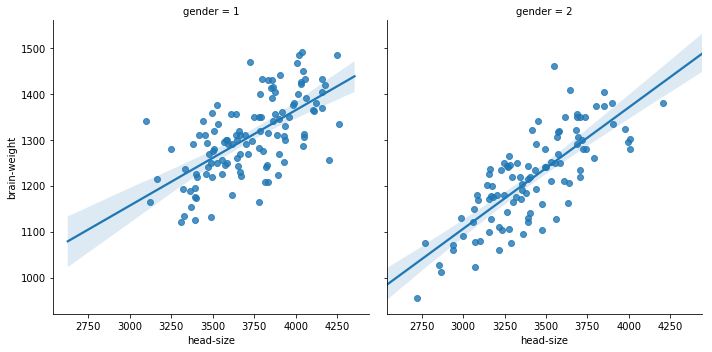

In [288]:
sns.lmplot(x='head-size', y='brain-weight', col='age-group', data=df)
sns.lmplot(x='head-size', y='brain-weight', col='gender', data=df)

### Preparing the dataset



In [289]:
y = df['brain-weight'].values
y.shape

(219,)

In [290]:
X = df['head-size'].values
X = X[:, np.newaxis]
X.shape

(219, 1)

In [291]:
X[0:3]

array([[3738],
       [4261],
       [3777]])

In [292]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=125)

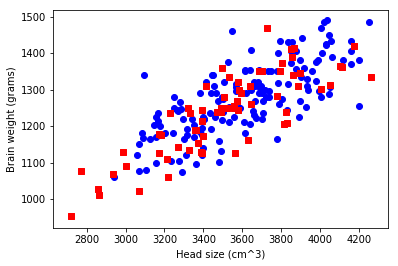

In [293]:

plt.scatter(X_train, y_train, c='blue', marker='o')
plt.scatter(X_test, y_test, c='red', marker='s')
plt.xlabel('Head size (cm^3)')
plt.ylabel('Brain weight (grams)');

### Fitting the model

In [294]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [295]:
print('r-squared:', lr.score(X_train, y_train),
      '\nadjusted r-squared:', 1- (1-lr.score(X_train, y_train)) * (X_train.shape[0]-1) / (X_train.shape[0]-X_train.shape[1]-1))


r-squared: 0.5396296501255994 
adjusted r-squared: 0.5365808398615305


In [296]:
y_pred = lr.predict(X_test)

y_hat_train = lr.predict(X_train)

### Evaluating the model

- r-squared of X_train vs r-squared of X_test
- prediction of X_train (y_hat_train) vs y_train 


In [297]:
print(f'R2 score: {lr.score(X_test, y_test)}' )

R2 score: 0.6499211088967884


In [298]:
lr.coef_, lr.intercept_

# y(weight) = 302 + 0.27 * x(size)

(array([0.23504117]), 428.4190065228987)

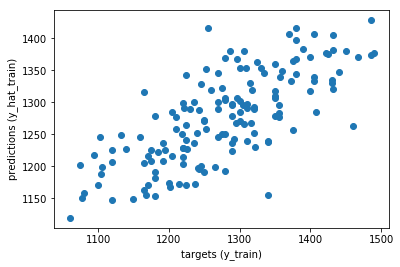

In [299]:
plt.scatter(y_train, y_hat_train)
plt.xlabel('targets (y_train)')
plt.ylabel('predictions (y_hat_train)')


plt.show()

# 45 degrees means it is the best.